loss is 16.1089
loss is 0.2997
loss is 0.0065
loss is 0.0002
loss is 0.0000
loss is 0.0000
loss is 0.0000
loss is 0.0000
loss is 0.0000
loss is 0.0000
Parameter containing:
tensor([[3.0000]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.8000], device='cuda:0', requires_grad=True)


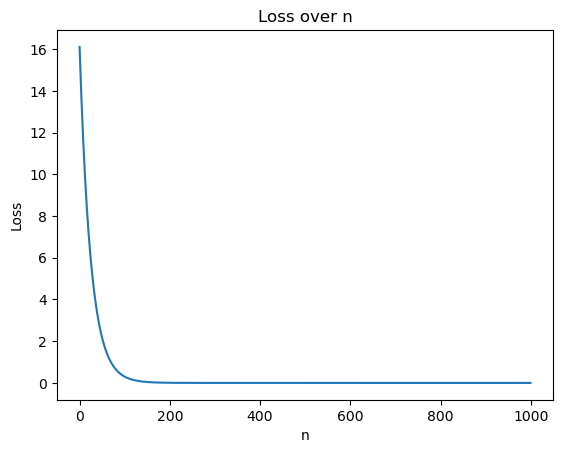

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Lr(nn.Module):
    def __init__(self):
        super(Lr, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        out = self.linear(x)
        return out 

model = Lr().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = torch.randn([500, 1], requires_grad=False).to(device)
y = x * 3 + 0.8

num = 1000
losses = []
for n in range(num):
    output = model(x)
    loss = criterion(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (n % 100) == 0:
        print(f"loss is {loss.item():.4f}")

for p in model.parameters():
    print(p)
# 绘制损失变化曲线
plt.plot(losses)
plt.xlabel('n')
plt.ylabel('Loss')
plt.title('Loss over n')
plt.show()

In [25]:
model.eval()  # 设置模型为评估模式
with torch.no_grad():  # 在评估模式下，不需要计算梯度
    output = model(x)
    eval_loss = criterion(output, y)
    print(f"Evaluation Loss: {eval_loss.item():.4f}")

Evaluation Loss: 0.0000
